# **BootCamp DS - 20243**
## **Actividad 4**
### **Presentado por:** Diego Chávez

### Contexto: 
En esta actividad final, veremos una aplicación de ciertos modelos de Machine Learning para resolver nuestras preguntas problemas relacinadas al negocio




## 1. Abstract

**Motivación**

El análisis de datos históricos de ventas y renovaciones en mi busca optimizar la toma de decisiones comerciales, mejorar la retención de clientes y aumentar la eficiencia en las renovaciones. La importancia de este estudio radica en la identificación de patrones de comportamiento en los clientes que permitan predecir tendencias y mejorar las estrategias de negocio.

**Audiencia**

Este análisis está dirigido a los equipos de ventas y renovaciones, gerencia comercial y analistas de datos dentro de la empresa. Además, puede ser útil para la alta dirección en la formulación de estrategias basadas en datos.

## 2. Preguntas/Hipótesis a Resolver

¿Cuáles son algunos factores clave que influyen en la renovación de los microcréditos?

¿Existen patrones estacionales en las ventas y renovaciones?

¿Cuál es la tasa de retención de clientes en distintos periodos de tiempo?

¿Qué características diferencian a los clientes que renuevan de aquellos que no lo hacen?

¿Se pueden predecir las probabilidades de renovación en función del historial de ventas y características de los clientes?

## EDA

In [24]:
# importamos la librerías
import pandas as pd
import numpy as np
import os

In [25]:
df = pd.read_excel(r"C:/Users/Diego Chavez/Desktop/BIT/BootCamp/BD.xlsx")

In [26]:
# Breve muestra de los datos
print(df.head(1))

# información general 
print(df.info())

# Resumen de las variables numéricas
print(df.describe())

   TIPO Número de Documento REFERIDO POR     Estado Desembolso  \
0  MINI             8505346            0  Desembolso Rechazado   

   Desembolso realizado Contabilidad Cliente: Nombre completo  \
0                                  0         Jose Luis Ardila   

  Fecha de formalización Fecha del Depósito  Salario Reportado del cliente  \
0             2024-06-14         2024-06-14                     2317399.92   

  Código Préstamo  ...  Ejecutivo  Cliente: #PrestamosFirmadosCartera  \
0        O-295356  ...        NaN                                 3.0   

  Fecha de creación Estado de Préstamo  Fecha de procesamiento del desembolso  \
0        2024-06-14          Rechazado                             2024-06-14   

   Fecha Hora de procesamiento del desembolso  Venta de ejecutivo  Fianza+IVA  \
0                         2024-06-14 16:18:00                 NaN      8925.0   

   Tasa interes  Tasa mora  
0        0.3083     0.3083  

[1 rows x 36 columns]
<class 'pandas.core.frame

In [27]:
# Revisando nulos
print(df.isnull().sum())

# borrando duplicados
df = df.drop_duplicates()

# convirtiendo las fecha con datetime
df["Fecha de formalización"] = pd.to_datetime(df["Fecha de formalización"], errors="coerce")
df["Fecha del Depósito"] = pd.to_datetime(df["Fecha del Depósito"], errors="coerce")
df["Fecha de creación"] = pd.to_datetime(df["Fecha de creación"], errors="coerce")
df["Fecha de procesamiento del desembolso"] = pd.to_datetime(df["Fecha de procesamiento del desembolso"], errors="coerce")
df["Fecha Hora de procesamiento del desembolso"] = pd.to_datetime(df["Fecha Hora de procesamiento del desembolso"], errors="coerce")

# configurando los valores numéricos
cols_to_numeric = [
    "Salario Reportado del cliente", "Monto Bruto Prestado", "Administración sobre monto solicitado",
    "IVA", "Intereses", "Total a pagar despues del desembolso", "Total a pagar con TYC",
    "Sumatoria de Intereses de Mora", "Saldo con intereses de mora", "Total a pagar con GAC", "Fianza+IVA"
]

for col in cols_to_numeric:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

TIPO                                               0
Número de Documento                                3
REFERIDO POR                                   57066
Estado Desembolso                                  3
Desembolso realizado Contabilidad                  0
Cliente: Nombre completo                          23
Fecha de formalización                             0
Fecha del Depósito                                 7
Salario Reportado del cliente                      0
Código Préstamo                                    0
Monto Bruto Prestado                               0
Listo para Desembolso                              0
Plazo                                              0
Status Inicial                                     1
Desembolso Realizado                               0
Tecnología                                         0
Administración sobre monto solicitado              0
IVA                                                0
Intereses                                     

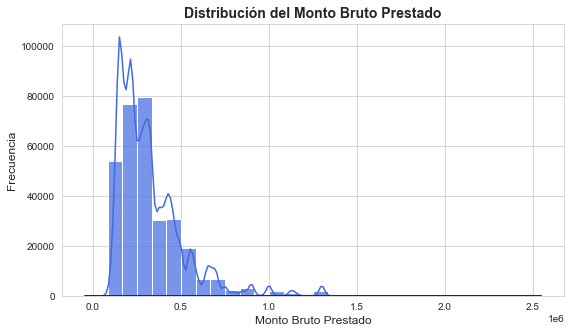

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# seteamos el tamaño
plt.figure(figsize=(9,5))

# histograma para monto brutpo
sns.histplot(df["Monto Bruto Prestado"], bins=30, kde=True, color="royalblue", alpha=0.7)

# curva del gráfico
sns.kdeplot(df["Monto Bruto Prestado"], color="darkred", linewidth=2)

# título y etiquetas
plt.title("Distribución del Monto Bruto Prestado", fontsize=14, fontweight="bold")
plt.xlabel("Monto Bruto Prestado", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ploteamos
plt.show()


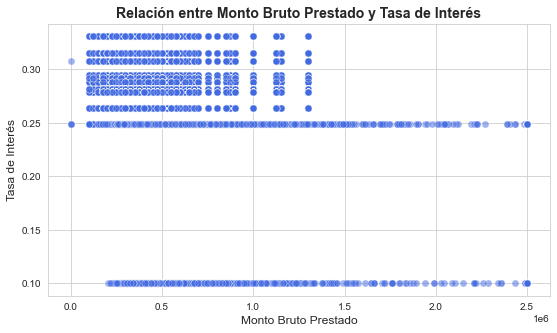

In [29]:
# elegimos un estilo
sns.set_style("whitegrid")

# figure
plt.figure(figsize=(9,5))

# scatter para monto brutp y tasa de interés
sns.scatterplot(
    x=df["Monto Bruto Prestado"], 
    y=df["Tasa interes"], 
    alpha=0.5,  
    s=50,  
    color="royalblue" 
)

# titulos y etiquetas
plt.title("Relación entre Monto Bruto Prestado y Tasa de Interés", fontsize=14, fontweight="bold")
plt.xlabel("Monto Bruto Prestado", fontsize=12)
plt.ylabel("Tasa de Interés", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ploteamos
plt.show()


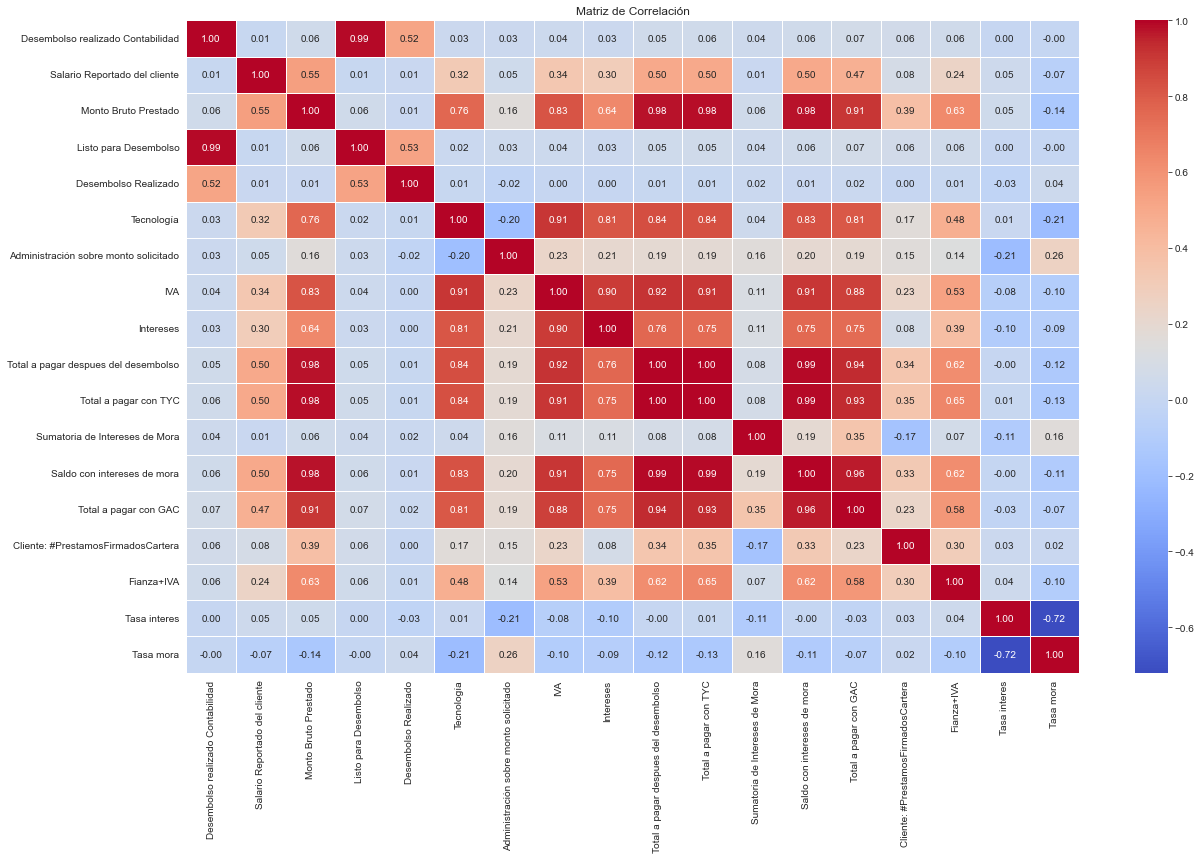

In [30]:
# matriz de correlación como mapa de calor
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

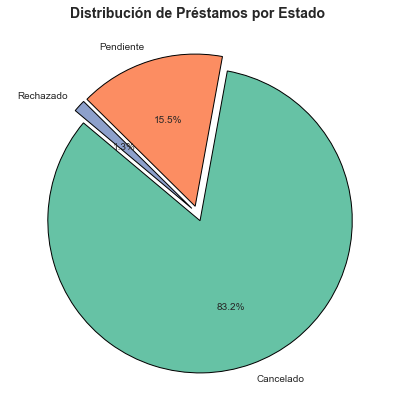

In [31]:
# elegimos una paleta de colores
colors = sns.color_palette("Set2", n_colors=3)

# pieplot
plt.figure(figsize=(7,7))
df["Estado de Préstamo"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    colors=colors, 
    explode=(0.05, 0.05, 0.05), 
    startangle=140,  
    wedgeprops={"edgecolor": "black"} 
)
# titulo 
plt.title("Distribución de Préstamos por Estado", fontsize=14, fontweight="bold")

plt.ylabel("")

# ploteamos
plt.show()


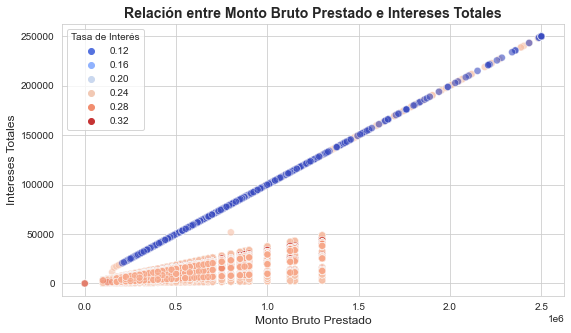

In [32]:

# seteadno un estilo
sns.set_style("whitegrid")

# figsize
plt.figure(figsize=(9,5))

# scatter para monto bruto e intereses por tasa
scatter = sns.scatterplot(
    x=df["Monto Bruto Prestado"], 
    y=df["Intereses"], 
    hue=df["Tasa interes"],  
    palette="coolwarm", 
    alpha=0.6, 
    s=50 
)


# titulos y etiquetas
plt.title("Relación entre Monto Bruto Prestado e Intereses Totales", fontsize=14, fontweight="bold")
plt.xlabel("Monto Bruto Prestado", fontsize=12)
plt.ylabel("Intereses Totales", fontsize=12)

# leyenda
plt.legend(title="Tasa de Interés", fontsize=10, loc="upper left")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ploteamos
plt.show()


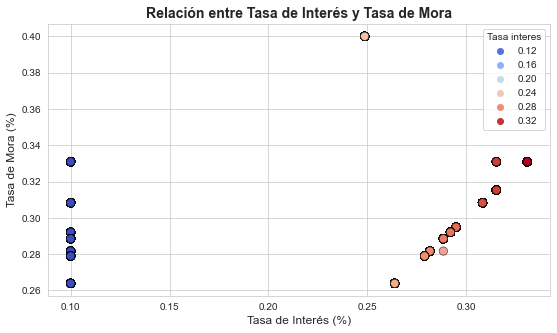

In [33]:
# definimos un estilo
sns.set_style("whitegrid")

# figura
plt.figure(figsize=(9,5))

# scatter para tasa de interes y mora
sns.scatterplot(
    x=df["Tasa interes"], 
    y=df["Tasa mora"], 
    alpha=0.7,  
    edgecolor="black",  
    s=70,  
    hue=df["Tasa interes"],  
    palette="coolwarm"  
)

# titulos y etiquetas
plt.title("Relación entre Tasa de Interés y Tasa de Mora", fontsize=14, fontweight="bold")
plt.xlabel("Tasa de Interés (%)", fontsize=12)
plt.ylabel("Tasa de Mora (%)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ploteamos
plt.show()
